# Exploration of the dataset
This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

## Description:
<br>
<dl>
  <dt>R&D</dt>
  <dd>Research and development – R&D – is the process by which a company works to obtain new knowledge that it might use to create new technology, products, services, or systems that it will either use or sell.</dd>
  <dt>Marketing spend</dt>
  <dd>represents the amount of money a marketing department spends on activities such as content marketing, paid advertising, SEO, social media, trade shows, and more. Spend is typically outlined in a company’s marketing budget.</dd>
  <dt>Administrative expenses (spend)</dt>
    <dd>are the expenses an organization incurs not directly tied to a specific function such as manufacturing, production, or sales.</dd>
    <dt>Profit</dt>
    <dd>is income remaining after settling all expenses.
</dd>
</dl>

In [1]:
#import the important libraries
import numpy as np 

import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

# Explore The Dataset

In [2]:
#import the data
train_df = pd.read_csv('50_Startups.csv')

In [3]:
#Explore the data
train_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#in this lab, we will drop State feature because we don't explain Onehot-Encoding in this lab 
train_df = train_df.drop("State", axis = 1)

In [5]:
#Explore the data after dropping the state feature
train_df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
#Explore the shape of the training dataset
train_df.shape

(50, 4)

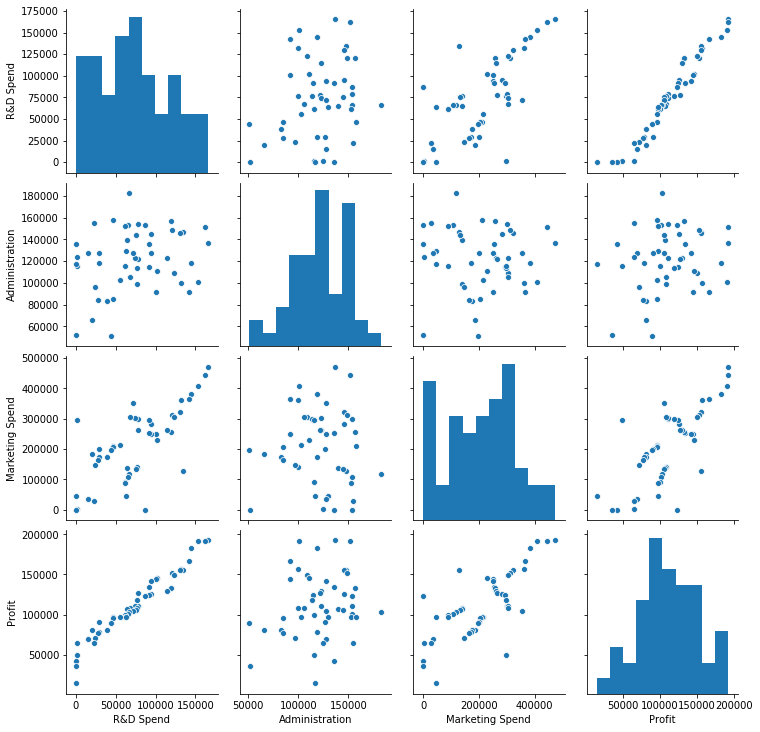

In [7]:
#Plot pairwise relationships in the dataset
sns.pairplot(train_df)

# Prepare The Dataset

In [8]:
#split the dataset into features and labels 
x_train = train_df[train_df.columns[train_df.columns != 'Profit']]
y_train = train_df[train_df.columns[train_df.columns == 'Profit']]

#lets print the shape of the features and labels
print("The Shape of x_train: ",x_train.shape)
print("The Shape of y_train: ",y_train.shape)

The Shape of x_train:  (50, 3)
The Shape of y_train:  (50, 1)


In [9]:
#First,convert the fearues into numpy array 
X_without_Xo = x_train.values

#(Optional) --> lets reduce the rank of the output, y, to be (50,) instead of (50,1) 
#And, convert it to numpy array  of size (50,)
y = y_train.values.reshape(50,)

In [13]:
#lets print the shape of the features and labels
print("The Shape of X:",X_without_Xo.shape)
print("The Shape of y:",y.shape)

The Shape of X: (50, 3)
The Shape of y: (50,)


In [15]:
#Define the number of the training examples
m = X_without_Xo.shape[0]

print("The Number of Training examples: {0}".format(m))

The Number of Training examples: 50


# Define Some Helper Functions
<br>
<dl>
  <dt>featureNormalize()</dt>
  <dd>For feature scalling to make the gradient descent converge much more quickly</dd>
  <dt>computeCost()</dt>
  <dd>For Computing cost for linear regression with multiple variables</dd>
  <dt>gradientDescent()</dt>
  <dd>For Updating the parameters</dd>
  <dt>pred()</dt>
  <dd>For making predictions</dd>
</dl>

In [16]:
def featureNormalize(X):
    '''
    Usage:
      #featureNormalize--> used for normalizing features
  
    Arguments:
      #X --> The Design Matrix
    
    Returns:
      #The Normalized Matrix
      
    Notes:
      #X is a matrix where each column is a feature and each row is an example
      #So, you need to perform the normalization separately for each feature
    '''
    
    #Preallocating some variables to be used later 
    X_norm = np.copy(X)
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))

    #compute the mean of the feature and subtract it from the dataset, storing the mean value in mu
    #Next, compute the standard deviation of each feature, storing the standard deviation in sigma.
    for i in range(X.shape[1]):
        mu[0, i] = mu[0, i] + np.mean(X_norm[:, i])
        sigma[0, i] = sigma[0, i] + np.std(X_norm[:, i])
        
    #Finally, compute the standard deviation of each feature and divide each feature by it's standard deviation, storing the result in x_norm
    for i in range(X.shape[1]):
        X_norm[:, i] = np.divide(np.subtract(X_norm[:, i], mu[0, i]), sigma[0, i])
        
    return X_norm, mu, sigma

In [17]:
def computeCost(X,y,theta):
    '''
    Usage:
      #computCost --> computes the cost for linear regression
  
    
    Arguments:
      #X --> The Design Matrix
      #y --> The Ground Truth
      #thea --> The Parameters which need to update
    
    Returns:
      #The cost value
    '''
    
    #Compute  Our hypothesis function 
    h = np.matmul(X,theta)
    
    #Compute the square errors using element-wise operations 
    sqrErrors = np.power((h-y), 2)
    
    #Compute the cost the function
    J = (1/2*m)*(np.sum(sqrErrors))
    
    return J

In [18]:
 def gradientDescent(X,y,theta,alpha,num_iters):
    '''
    Usage:
      #gradientDescent --> computes the gradient descent for linear regression
  
    
    Arguments:
      #X --> The Design Matrix
      #y --> The Ground Truth
      #theta --> The Parameters which need to update
      #alpha --> is the learning rate which indicates the learning step or how far we go down 
      #num_iters--> is the nymber of iterations needed to go to the global optimal value 
    
    Returns:
      #The updated parameters,theta 
      #cost_history: which is list containing the the values of the cost function, J, for every iteration
    '''
    #Define the cost history as empty list
    cost_history = []
    
    #Keep until Convergence
    for i in range(num_iters+1):
        
        #dtheta is the partial derivates of cost function with respect to the parameters, theta
        dtheta = (1/m)*((np.matmul(np.matmul(X.T,X), theta)) - (np.matmul(X.T, y)))
        
        #Update theta
        theta = theta - alpha*dtheta
        
        #While debugging, it can be useful to print out the values of the cost function (computeCost) and gradient here.
        cost = computeCost(X,y,theta)
        
        #Append the value of the cost at a specific value for theta to cost_history
        cost_history.append(cost)
        
        #print the cost function for every itration to track its new value step-by-step
        print("Reached iteration: {0}, the cost = {1}".format(i, cost))
    
    print("\n\nParameters have been trained!") 
    
    return theta, cost_history

In [19]:
def pred(input_pred,theta):
    '''
    Usage:
      #pred --> used to predict the output of the input
      
    Arguments:
      #input_pred --> the input you want to predict its output 
      #theta --> the updated param
    
    Returns:
      #The predicted output
    '''
    prediction = np.matmul(input_pred, theta)
    
    print("The output: {0}".format(prediction))
    
    return prediction

# Training The Model

In [24]:
#Normalize the features 
#_,_ indicate that we don't want to return mu and sigma so the function just return the normalize features
X_normalized,_,_ = featureNormalize(X_without_Xo)

In [28]:
#Look at the shape of the Normalized features
X_normalized.shape

(50, 3)

In [26]:
#Create array of ones , which representes the x_0, to combine it with the rest of the features
#We don't Normalize Xo because it always equals x to the power 0 so it always equals to one
ones = np.ones((50,1))

#Combining  so the shape of  the features will be (30,2) which represents the design matrix
X = np.concatenate((ones, X_normalized), axis = 1)

In [27]:
theta, cost_history = gradientDescent(X,y,theta = np.array([0, 0,0,0]),alpha = 0.01,num_iters = 1000)

Reached iteration: 0, the cost = 17300557954875.314
Reached iteration: 1, the cost = 16935766855659.059
Reached iteration: 2, the cost = 16579089862112.441
Reached iteration: 3, the cost = 16230335441616.898
Reached iteration: 4, the cost = 15889316920136.47
Reached iteration: 5, the cost = 15555852349106.742
Reached iteration: 6, the cost = 15229764376239.535
Reached iteration: 7, the cost = 14910880120121.54
Reached iteration: 8, the cost = 14599031048488.715
Reached iteration: 9, the cost = 14294052860062.344
Reached iteration: 10, the cost = 13995785369836.203
Reached iteration: 11, the cost = 13704072397707.934
Reached iteration: 12, the cost = 13418761660351.133
Reached iteration: 13, the cost = 13139704666228.05
Reached iteration: 14, the cost = 12866756613646.04
Reached iteration: 15, the cost = 12599776291763.889
Reached iteration: 16, the cost = 12338625984457.422
Reached iteration: 17, the cost = 12083171376956.426
Reached iteration: 18, the cost = 11833281465167.979
Reached

In [31]:
#Lets make prediction, in this case we wil make predictions one of the training examples 
print("The Ground Truth: {0}".format(y[0]))
prediction = pred(X[0], theta)

print("The Error:{0}".format(abs(prediction-y[0])))

The Ground Truth: 192261.83
The output: 192910.75929252635
The Error:648.929292526358


# Congratulations